<a href="https://colab.research.google.com/github/heejung1/Review/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import requests
import pandas as pd
import re
import json

df = pd.read_csv('/content/drive/MyDrive/all_review.csv', encoding='utf-8-sig')

content = df['리뷰'].tolist()
all_content = "\n".join(content)



In [25]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

word_tokens = word_tokenize(all_content)
sent_tokens = sent_tokenize(all_content)

print(word_tokens)
print(sent_tokens)

['옛날만', '못해요', '딱한쪽골목길의', '먹거리만', '활성청결좀하자', '시장은', '언제나', '정겹고', '사람냄새', '나는곳', '재방문', '의사', '있습니다', '다양한', '제품', '가성비', '갑', '다양한', '먹거리와', '용품들', '저렴한금액', '좋아요', '사람구경', '많이했어요외국인도많고모자두개', '만원주고', '딸하고저하고하나씩나눠쓰고', '즐거운시간보냈네요더보기', '소소한', '재미', '호떡', '맛있어요', '특히', '치즈호떡', '볼거리', '많아서', '좋네요', '시장구경하는거', '좋아해서', '가끔가요', '쇼핑', '하기', '에', '펀해요', '가격만족', '대한민국의', '최고의시장', '남대문꽃시장', '다녀왔어요', '대체로', '나쁘지', '않았음', '관광객', '종종', '보임갈치조림', '먹으러', '간건데', '양은', '좀', '적었음길거리', '간식', '나쁘지', '않음', '좀', '즐기다가', '명동', '넘어가는게', '나음', '구제옷을', '세옷인마냥', '속여파는곳다신', '방문하고싶지않은곳정직하게', '장사합시다대대손손', '망하기전에더보기', '여기는', '외국인상대로', '장사는곳같아요', '서울', '한복판에서', '전통시장의', '느낌을', '받을', '구', '있는', '곳', '언제', '방문해도', '좋은', '남대문', '시장', '수입상가', '지하', '멸치국수집이', '지존임', '대한민국', '의', '마켓', '표본구경가세요', '늘', '가볼만', '가격싸요', '만두가', '넘', '맛있구', '여기', '삼촌들이', '친절하구', '재밌어용', '조아요', '예전엔', '더', '많은', '상점이', '있었는데', '상인들', '예의가', '없음', '친절하신', '가게는', '대부분', '젊은', '사장님들이', '운영하는', '곳이고', '아줌마', '아저씨들이', '운영하는', '가게는', '전부', '예의가', '없네요', 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 33.7 MB/s eta 0:00:00


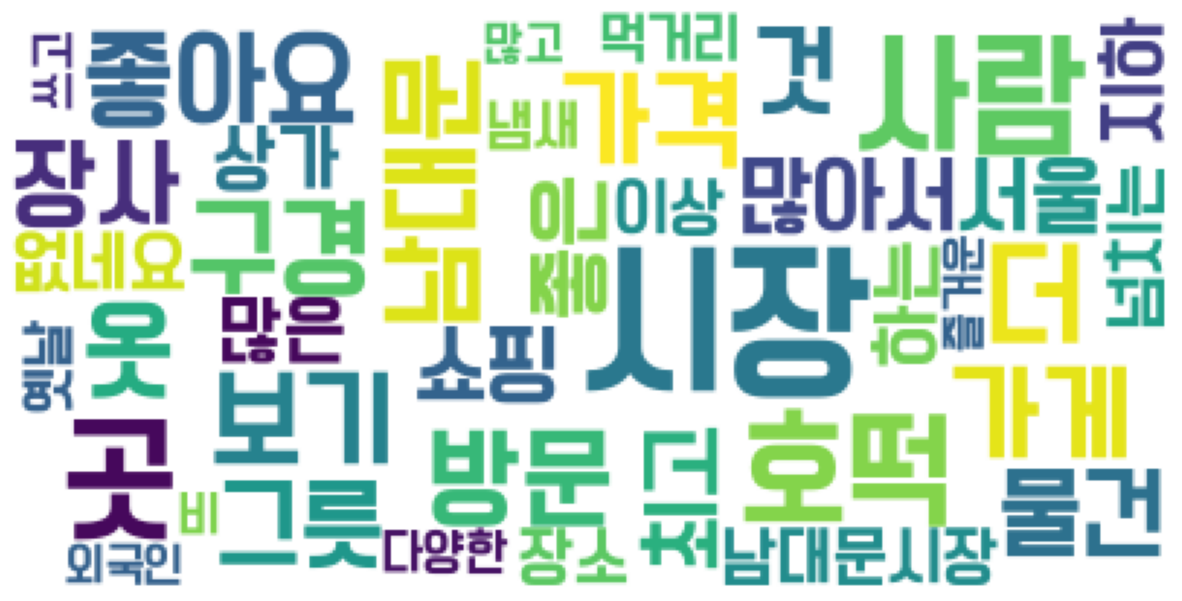

In [35]:
from nltk.corpus import stopwords
from konlpy.tag import Okt
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# 불용어 제거
stop_words = ['있습니다', '곳', '더', '했어요', '아줌마','저', '제', '하고', '하는', '에', '의', '도', '는', '것', '들', '에요', '라', '구요', '다', '그러나', '과', '이', '가', '을', '를', '은', '던', '면', '해서', '하면', '거', '되', '면서', '뿐', '여', '만', '아니', '게', '나', '어', '겠', '지', '며', '고', '까지', '랑', '해도', '건데', '같이', '등', '잖아', '말할', '필요없이', '그냥', '점점', '여전히', '언제나', '종종', '늘', '예전엔', '좀', '넘', '바로', '한번쯤']
filtered_words = [word for word in word_tokens if word not in stop_words]

# 형태소 분석
okt = Okt()
pos_words = []
for word in filtered_words:
    pos_words.extend([pos_word for pos_word, pos in okt.pos(word) if pos in ['Noun', 'Adjective', 'Verb']])

# 빈도수 계산
word_counts = collections.Counter(pos_words)

# 키워드 선정
keywords = [word for word, count in word_counts.most_common(10) if len(word) > 1]

# 워드 클라우드 생성
wordcloud = WordCloud(max_words=40,font_path='/content/drive/MyDrive/210 맨발의청춘R.ttf',stopwords=stop_words, background_color='white').generate_from_frequencies(dict(word_counts))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# 워드 클라우드 이미지 저장
wordcloud.to_file('wordcloud.png')